# Day 09 面向对象进阶


## `@property` 装饰器

直接将属性暴露给外界也可能有问题，比如我们没有办法检查赋给属性的值是否有效。

受保护属性：单下划线开头。通过这种方式来暗示属性是受保护的，不建议外界直接访问。

访问属性可以通过属性的getter（访问器）和setter（修改器）方法进行对应的操作。

要做到这点，就可以考虑使用@property包装器来包装getter和setter方法，使得对属性的访问既安全又方便，

In [12]:
class Person(object):

    def __init__(self, name, age) -> None:
        self._name = name 
        self._age = age
    
    @property
    def name(self):
        return self.name
    
    @property
    def age(self):
        return self.age

    @age.setter
    def age(self, age):
        self._age = age

    # @name.setter
    # def name(self, name):
    #     self._name = name
    
    def play(self):
        if self._age <= 16:
            print('%s正在玩飞行棋.' % self._name)
        else:
            print('%s正在玩斗地主.' % self._name)

person = Person('王大锤', 12)
person.play()

person.age = 22
person.play()

person.name = '白元芳' # 报错，未设置name的setter。无法修改
person.play()

王大锤正在玩飞行棋.
王大锤正在玩斗地主.


AttributeError: can't set attribute 'name'

## ``__slot__``
限定对象可以绑定的属性

只对当前类作用域生效，不对子类生效

In [13]:
class Person(object):

    # 限定Person对象只能绑定__name, __age和__gender属性
    __slots__ = ('__name', '__age', '__gender')

    def __init__(self, name, age) -> None:
        self.__name = name 
        self.__age = age
    
    @property
    def name(self):
        return self.name
    
    @property
    def age(self):
        return self.age

    @age.setter
    def age(self, age):
        self.__age = age

    # @name.setter
    # def name(self, name):
    #     self.__name = name
    
    def play(self):
        if self.__age <= 16:
            print('%s正在玩飞行棋.' % self.__name)
        else:
            print('%s正在玩斗地主.' % self.__name)

person = Person('王大锤', 22)
person.play()

person.__gender = '男'
person.play()

# __slot__中未定义允许_education属性，报错
person._education = '高中'

王大锤正在玩斗地主.


AttributeError: 'Person' object has no attribute '__gender'

## 静态方法与类方法

### 静态方法

调用该方法不需要对象已创建。

无需添加必要参数（如`self`）


In [11]:
from math import sqrt

class Triangle(object):

    def __init__(self, a, b, c):
        self._a = a
        self._b = b
        self._c = c

    # 定义静态方法
    @staticmethod
    def is_valid(a, b, c):
        return a + b > c and b + c > a and a + c > b
    
    # 对象方法-计算周长
    def perimeter(self):
        return self._a + self._b + self._c

    # 对象方法-计算面积
    def area(self):
        half = self.perimeter() / 2
        return sqrt(half * (half - self._a) *
                    (half - self._b) * (half - self._c))

a, b, c = 3, 4, 5
# 调用静态方法检查是否构成三角形
if Triangle.is_valid(a, b, c):
    t = Triangle(a, b, c)
    print(t.perimeter())
    print(t.area())


12
6.0


### 类方法

代表的是当前类相关的信息的对象.

通过这个参数我们可以获取和类相关的信息并且可以创建出类的对象。

类方法的第一个参数约定名为cls。



In [19]:
from time import time, localtime, sleep

class Clock(object):
    def __init__(self, hour=0, _minute=0, second=0):
        self._hour = hour
        self._minute = _minute
        self._second = second
    
    @classmethod
    def now(cls):
        ctime = localtime(time())
        # 通过类方法创建对象
        return cls(ctime.tm_hour, ctime.tm_min, ctime.tm_sec)
    
    def run(self):
        """走字"""
        self._second += 1
        if self._second == 60:
            self._second = 0
            self._minute += 1
            if self._minute == 60:
                self._minute = 0
                self._hour += 1
                if self._hour == 24:
                    self._hour = 0

    def show(self):
        """显示时间"""
        return '%02d:%02d:%02d' % \
                (self._hour, self._minute, self._second)

# 通过类方法创建对象并获取系统时间
clock = Clock.now()

while True:
    print(clock.show())
    sleep(1)
    clock.run




15:24:53
15:24:53
15:24:53
15:24:53
15:24:53


KeyboardInterrupt: 

## 类之间的关系

- is-a 继承/泛化：学生-人，手机-电子产品
- has-a 关联：部门-员工，汽车-引擎
- use-a 依赖：司机-汽车（司机有一个驾驶的行为（方法），其中（的参数）需要调用汽车）

面向对象建模：UML

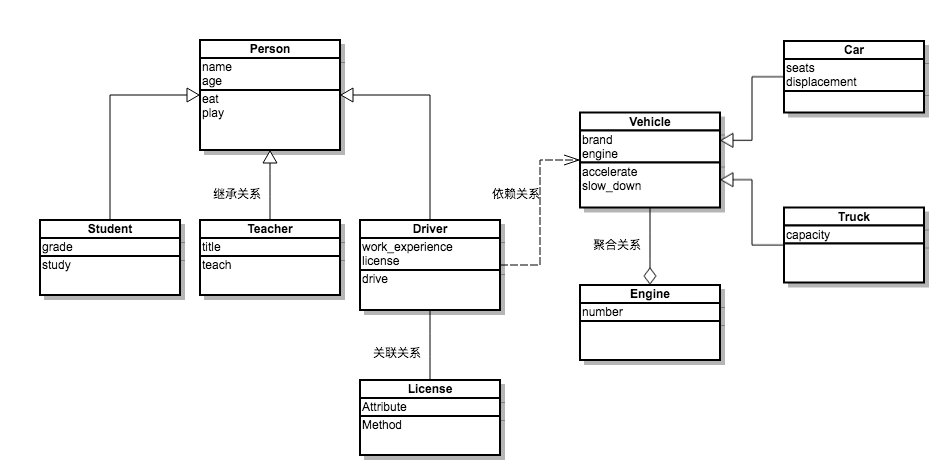

## 继承与多态

在已有类的基础上创建新类，从而减少重复代码的编写。
- 父类（超类、基类）：提供继承信息的类。
- 子类（派生类、衍生类）：得到继承信息的类。

继承原则：里氏替换原则

In [20]:
# 父类Person
class Person(object):

    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def eat(self):
        print(f'{self.name}正在吃饭.')
    
    def sleep(self):
        print(f'{self.name}正在睡觉.')


class Student(Person):
    # 调用父类初始化方法
    def __init__(self, name, age):
        super().__init__(name, age)
    
    def study(self, course_name):
        print(f'{self.name}正在学习{course_name}.')

class Teacher(Person):
    def __init__(self, name, age, title):
        # 调用父类初始化方法
        super().__init__(name, age)
        # 定义子类独特属性title
        self.title = title
    
    def teach(self, course_name):
        print(f'{self.name}{self.title}正在讲授{course_name}.')

stu1 = Student('白元芳', 21)
stu2 = Student('狄仁杰', 22)
teacher = Teacher('武则天', 35, '副教授')
stu1.eat()
stu2.sleep()
teacher.teach('Python程序设计')
stu1.study('Python程序设计')


白元芳正在吃饭.
狄仁杰正在睡觉.
武则天副教授正在讲授Python程序设计.
白元芳正在学习Python程序设计.


重写：子类对父类方法的重写

多态：子类重写方法后，调用相同方法的不同子类表现出多态行为（调用相同方法，做了不同的事情）